In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)

In [4]:
X

array([[0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       ...,
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ]])

In [5]:
Y

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10204082, 0.10204082, 0.10204082, ..., 0.10204082, 0.10204082,
        0.10204082],
       [0.20408163, 0.20408163, 0.20408163, ..., 0.20408163, 0.20408163,
        0.20408163],
       ...,
       [4.79591837, 4.79591837, 4.79591837, ..., 4.79591837, 4.79591837,
        4.79591837],
       [4.89795918, 4.89795918, 4.89795918, ..., 4.89795918, 4.89795918,
        4.89795918],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ]])

In [6]:
Z = f(X, Y)

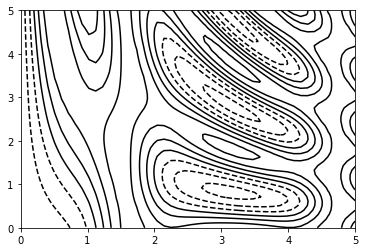

In [7]:
plt.contour(X, Y, Z, colors='black')

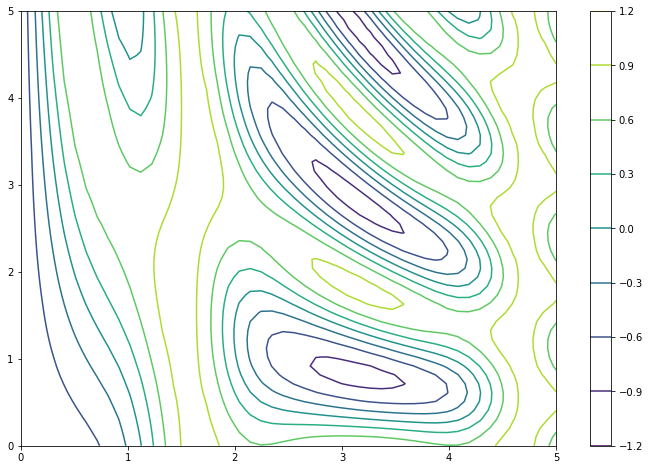

In [8]:
plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z)
plt.colorbar()  

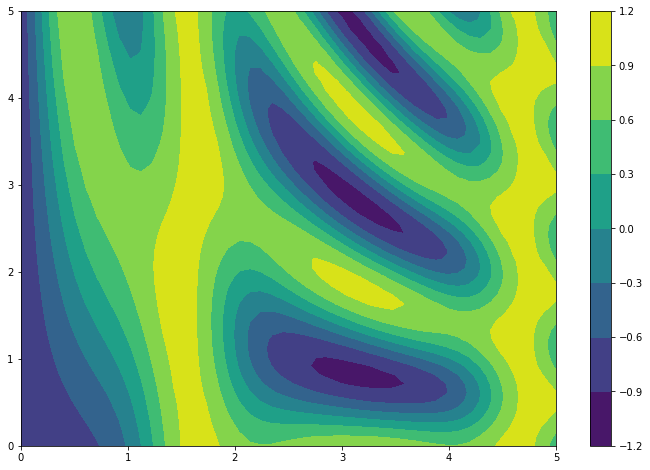

In [9]:
plt.figure(figsize=(12, 8))
plt.contourf(X, Y, Z)
plt.colorbar()

(0.0, 5.0, 0.0, 5.0)

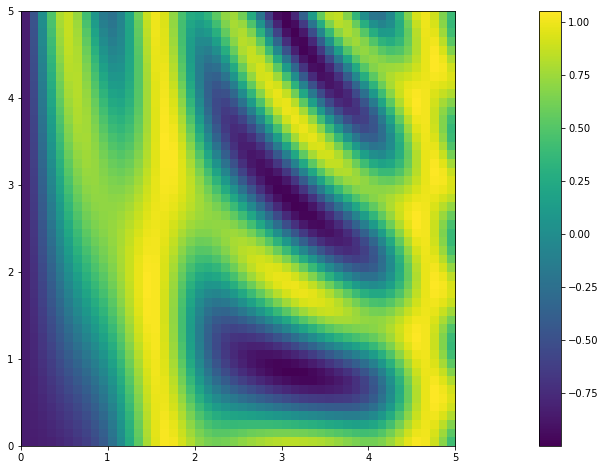

In [10]:
plt.figure(figsize=(12, 8))
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower')
plt.colorbar()
plt.axis('image')

(array([0.00490019, 0.00980037, 0.00980037, 0.00980037, 0.0343013 ,
        0.04410167, 0.0686026 , 0.14210539, 0.15680594, 0.16660632,
        0.23030873, 0.2401091 , 0.33321263, 0.35771356, 0.343013  ,
        0.39201486, 0.32341226, 0.3773143 , 0.32341226, 0.2744104 ,
        0.33321263, 0.26461003, 0.17640669, 0.08820334, 0.08820334,
        0.0343013 , 0.04410167, 0.01470056, 0.00490019, 0.00980037]),
 array([-3.20824066, -3.00416676, -2.80009287, -2.59601897, -2.39194508,
        -2.18787118, -1.98379728, -1.77972339, -1.57564949, -1.3715756 ,
        -1.1675017 , -0.96342781, -0.75935391, -0.55528002, -0.35120612,
        -0.14713223,  0.05694167,  0.26101556,  0.46508946,  0.66916335,
         0.87323725,  1.07731115,  1.28138504,  1.48545894,  1.68953283,
         1.89360673,  2.09768062,  2.30175452,  2.50582841,  2.70990231,
         2.9139762 ]),
 <a list of 1 Patch objects>)

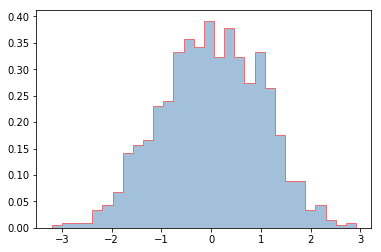

In [11]:
data = np.random.randn(1000)
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='red')

In [12]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

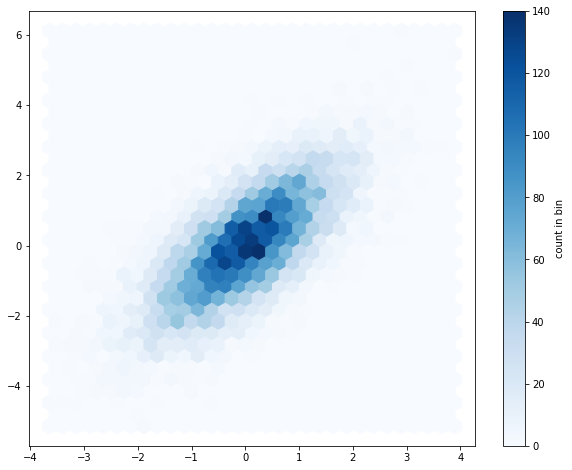

In [13]:
plt.figure(figsize=(10, 8))
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

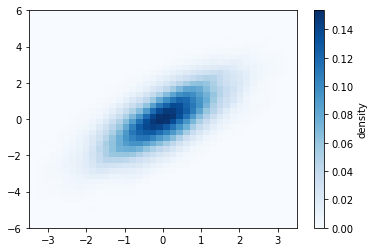

In [14]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

In [15]:
x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))

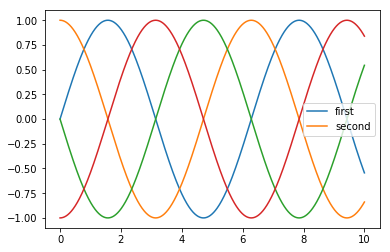

In [16]:
lines = plt.plot(x, y)
plt.legend(lines[:2], ['first', 'second'])

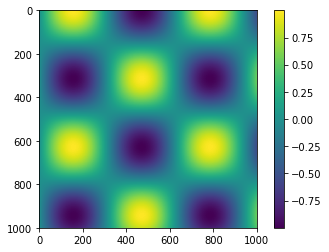

In [17]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I, cmap='viridis')
plt.colorbar()

In [18]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """为配色方案显示灰度图"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # 将RGBA色转换为不同亮度的灰度值
    # 参考链接http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """用等价的灰度图表示配色方案"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2),
    subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

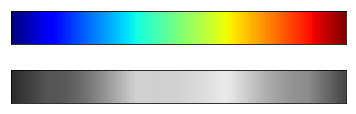

In [19]:
view_colormap('jet')

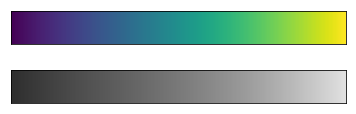

In [20]:
view_colormap('viridis')

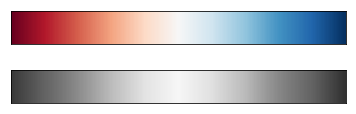

In [21]:
view_colormap('RdBu')

In [22]:
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

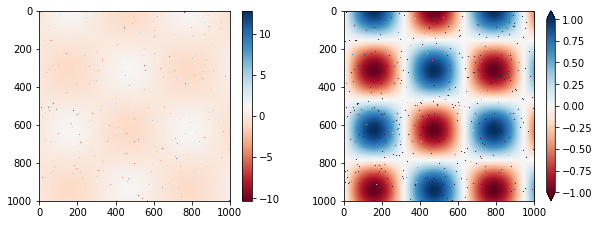

In [23]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

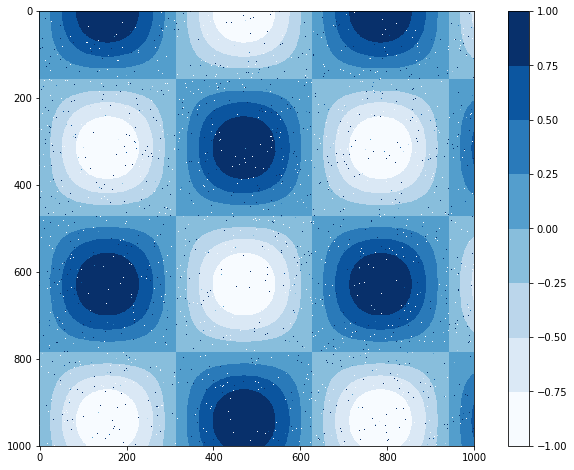

In [24]:
plt.figure(figsize=(12, 8))
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 8))
plt.colorbar()
plt.clim(-1, 1)

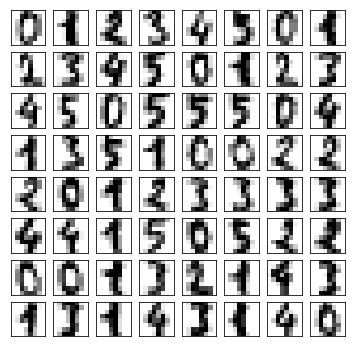

In [25]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [26]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

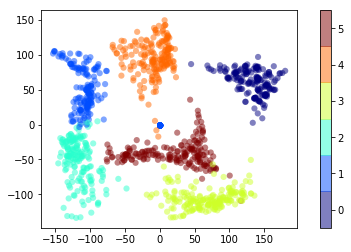

In [27]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, alpha=0.5,
            c=digits.target, cmap=plt.cm.get_cmap('jet', 6))
plt.colorbar()
plt.axis('image')
plt.clim(-0.5, 5.5)

In [28]:
plt.style.use('classic')

In [29]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

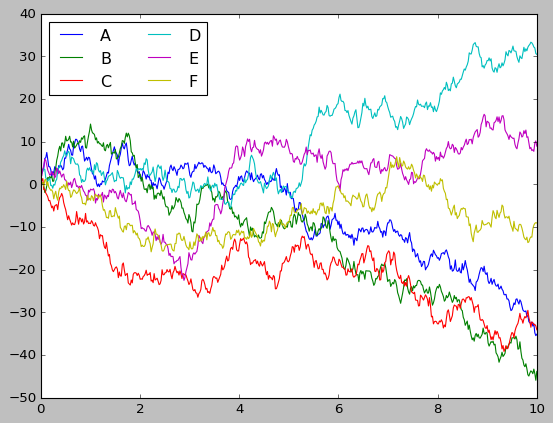

In [30]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [31]:
import seaborn as sns
sns.set()

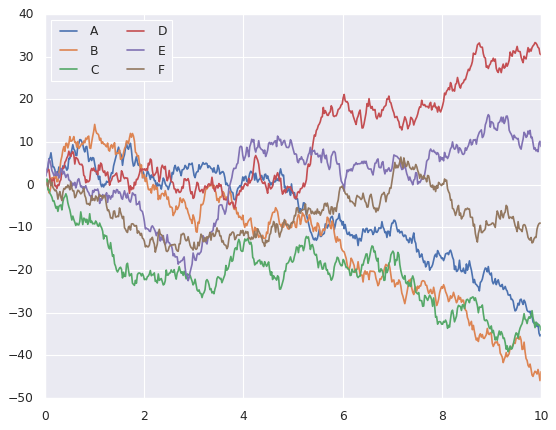

In [32]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

#### 4.16.3案例 : 探索马拉松比赛成绩数据

In [33]:
data = pd.read_csv('data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [34]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [35]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [36]:
data = pd.read_csv('data/marathon-data.csv',
                   converters={'split': convert_time, 'final': convert_time})

In [37]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [38]:
data['split_sec'] = data['split'].astype(int) / 1e9
data['final_sec'] = data['final'].astype(int) / 1e9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


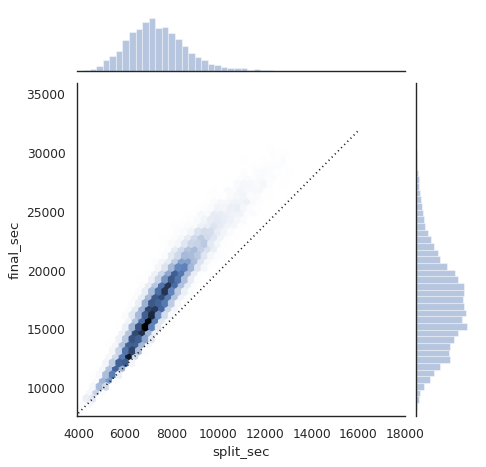

In [39]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [40]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

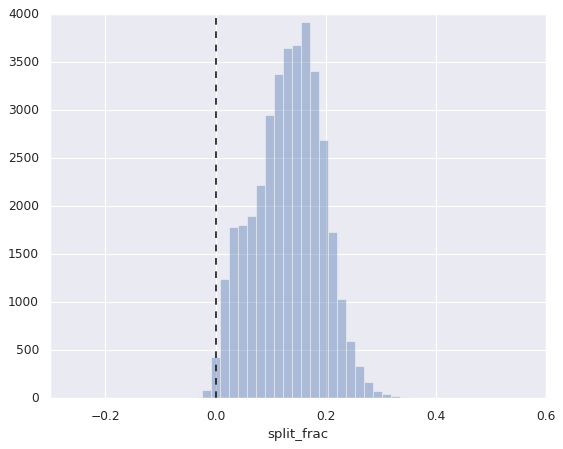

In [41]:
sns.distplot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle="--")

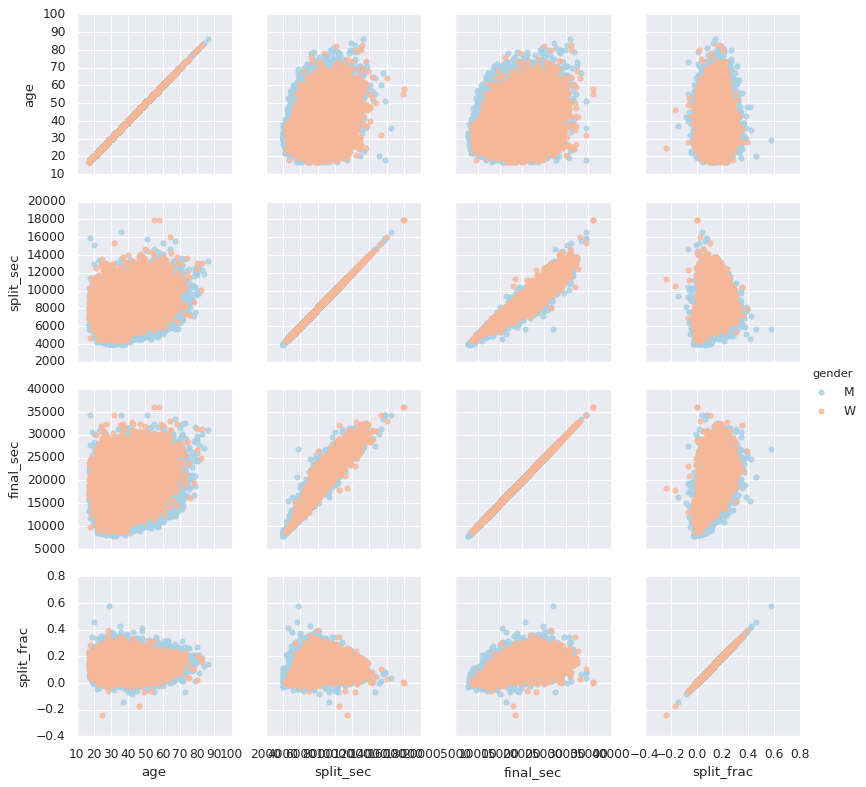

In [42]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

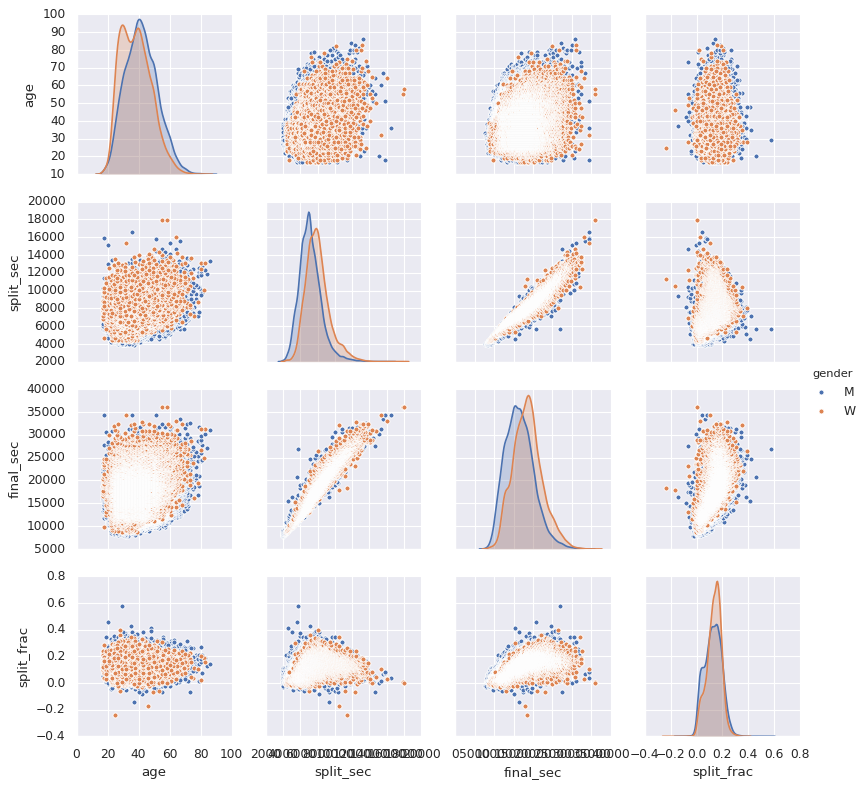

In [43]:
sns.pairplot(data, hue='gender')

Text(0.5, 0, 'split_frac')

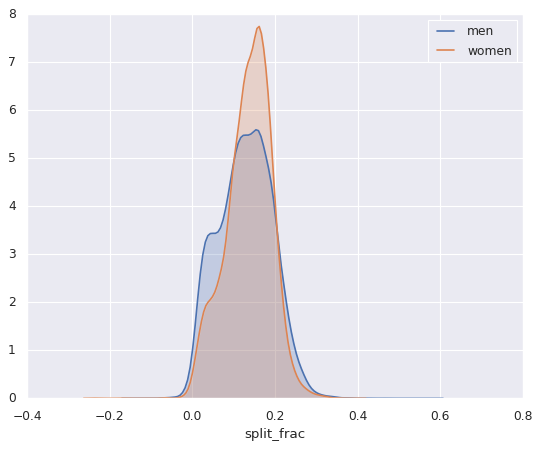

In [44]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac')

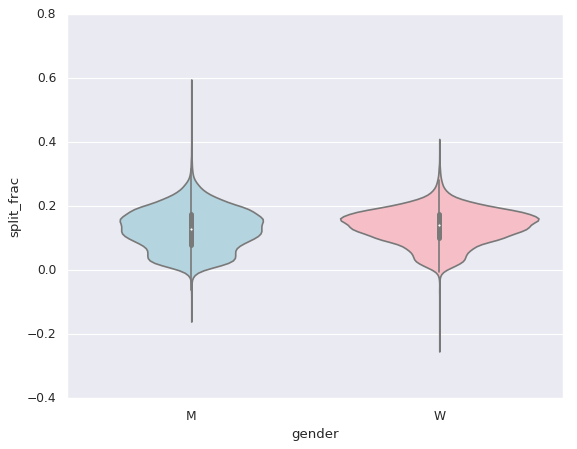

In [45]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"])

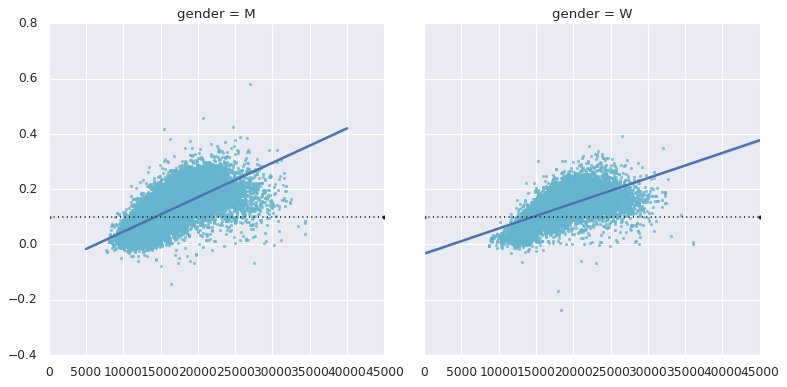

In [46]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")